In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
heart_df = pd.read_csv("../Datasets/heart_disease_uci.csv")


In [22]:
heart_df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [23]:
heart_df.shape


(920, 16)

In [24]:
heart_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [25]:
heart_df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


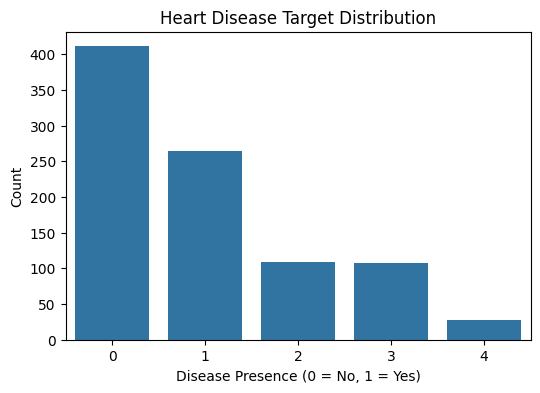

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=heart_df)
plt.title("Heart Disease Target Distribution")
plt.xlabel("Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/_lib/_util.py:1280: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


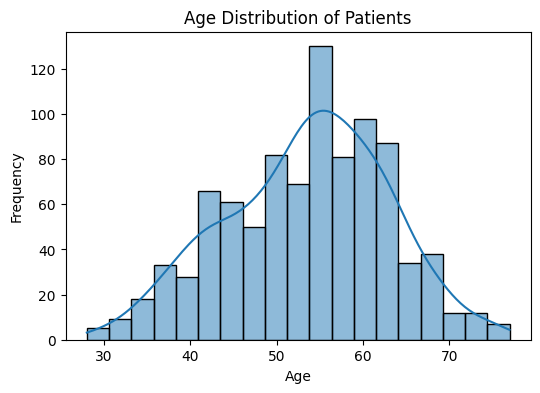

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(heart_df['age'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


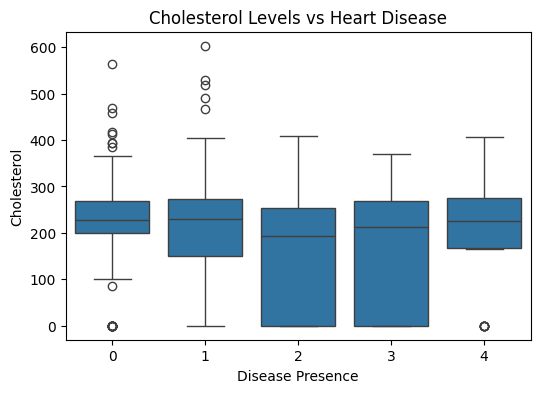

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x='num', y='chol', data=heart_df)
plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Disease Presence")
plt.ylabel("Cholesterol")
plt.show()


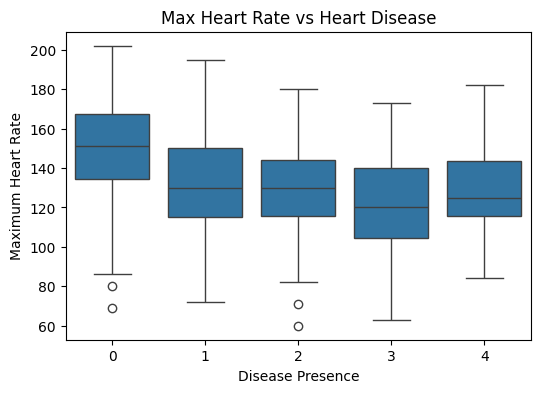

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='num', y='thalch', data=heart_df)
plt.title("Max Heart Rate vs Heart Disease")
plt.xlabel("Disease Presence")
plt.ylabel("Maximum Heart Rate")
plt.show()


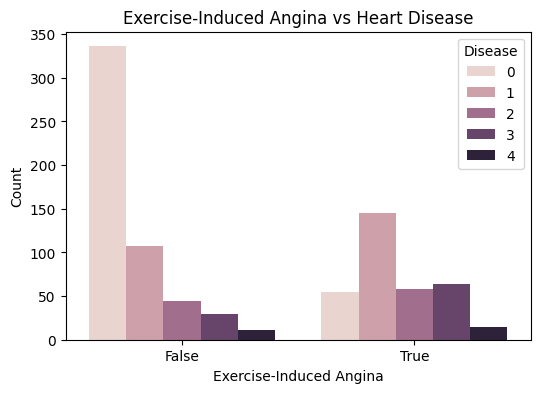

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x='exang', hue='num', data=heart_df)
plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina")
plt.ylabel("Count")
plt.legend(title="Disease")
plt.show()


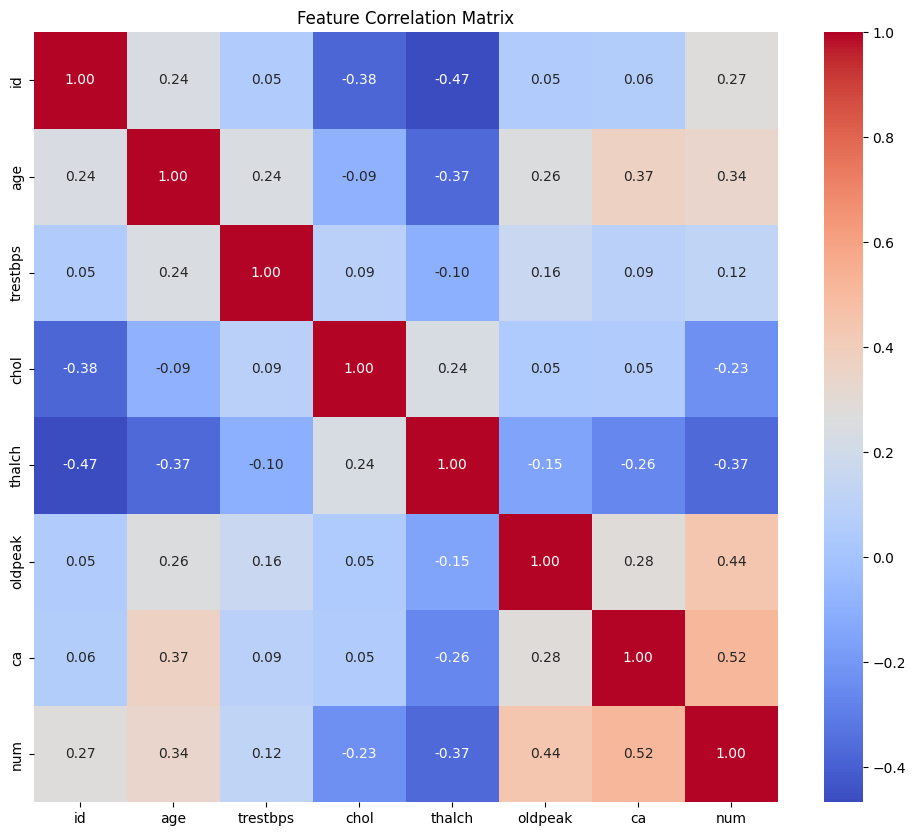

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(
    heart_df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()


EDA Insights:

Patients with heart disease tend to have lower maximum heart rate.

Age and cholesterol show moderate correlation with disease presence.

Exercise-induced angina is strongly associated with heart disease.

Several features show meaningful correlations, supporting ML-based prediction.

In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt

os.makedirs("../Results", exist_ok=True)

# Load processed training data
X_train = pd.read_csv("../Datasets/processed_heart_X_train.csv")




In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

os.makedirs("../Results", exist_ok=True)

# Load raw dataset
heart_raw = pd.read_csv("../Datasets/heart_disease_uci.csv")


y_full = heart_raw["num"].apply(lambda x: 1 if x > 0 else 0)

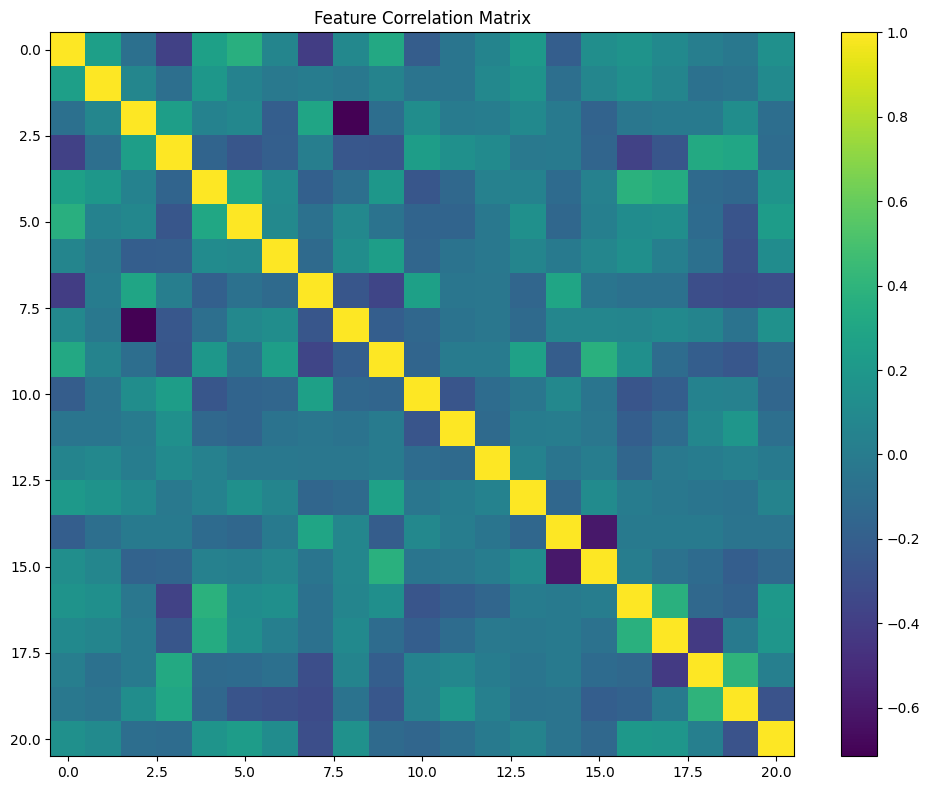

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(X_train.corr(), aspect="auto")
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.tight_layout()

plt.savefig("../Results/eda_correlation_matrix.pdf")
plt.show()


In [53]:
_, _, y_train, y_test = train_test_split(
    heart_raw.drop(columns=["num"]),
    y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)


In [54]:
y_train = y_train.to_numpy().ravel()
y_test  = y_test.to_numpy().ravel()


In [55]:
print("y_train shape:", y_train.shape)
print("Unique classes:", np.unique(y_train))


y_train shape: (736,)
Unique classes: [0 1]


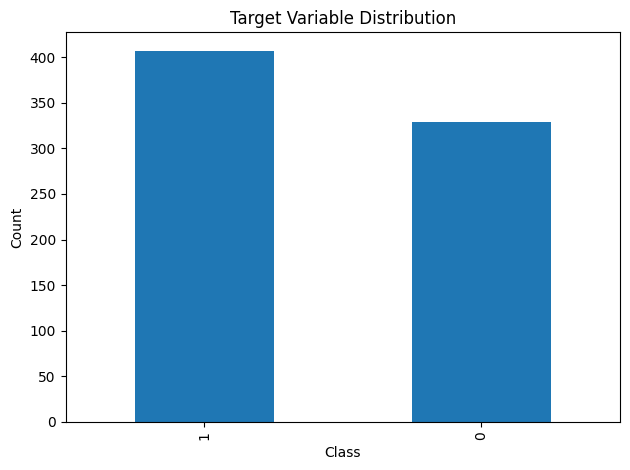

In [56]:
pd.Series(y_train).value_counts().plot(kind="bar")
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../Results/eda_target_distribution.pdf")
plt.show()
